In [13]:
dataset = ['bho_bhtb-ud-test.conllu','bn_bru-ud-test.conllu','fa_perdt-ud-train.conllu',
             'grc_ptnk-ud-train.conllu','hi_hdtb-ud-train.conllu','hu_szeged-ud-train.conllu',
             'ta_ttb-ud-train.conllu','te_mtg-ud-train.conllu','ur_udtb-ud-train.conllu',
             'xnr_kdtb-ud-test.conllu']

lang_code = [file_name.split('_')[0] for file_name in dataset]
lang_dict = {lang_code[i]:dataset[i] for i in range(len(dataset))}

In [14]:
lang_dict

{'bho': 'bho_bhtb-ud-test.conllu',
 'bn': 'bn_bru-ud-test.conllu',
 'fa': 'fa_perdt-ud-train.conllu',
 'grc': 'grc_ptnk-ud-train.conllu',
 'hi': 'hi_hdtb-ud-train.conllu',
 'hu': 'hu_szeged-ud-train.conllu',
 'ta': 'ta_ttb-ud-train.conllu',
 'te': 'te_mtg-ud-train.conllu',
 'ur': 'ur_udtb-ud-train.conllu',
 'xnr': 'xnr_kdtb-ud-test.conllu'}

In [15]:
VO=[]
OV= []
for key, val in lang_dict.items():
    vo,ov = 0,0
    with open(val, 'r') as f:
        for line in f.readlines():
            if '# text' not in line and 'obj' in line:
                components = line .split('\t')
                if components[0]> components[6]:
                    vo+=1
                else:
                    ov+=1
    
    total  = vo+ov
    VO.append(vo/total if total>0 else 0)
    OV.append(ov/total if total>0 else 0)



In [22]:
print(VO)
print(OV)

[0.2446043165467626, 0.0625, 0.25473055217439416, 0.8194740582800284, 0.21749566608881185, 0.4671890303623898, 0.15, 0.00510204081632653, 0.21181299072091364, 0.12631578947368421]
[0.7553956834532374, 0.9375, 0.7452694478256059, 0.18052594171997158, 0.7825043339111881, 0.5328109696376102, 0.85, 0.9948979591836735, 0.7881870092790864, 0.8736842105263158]


In [20]:
import sys
import matplotlib.pyplot as plt


ValueError: Format 'json' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

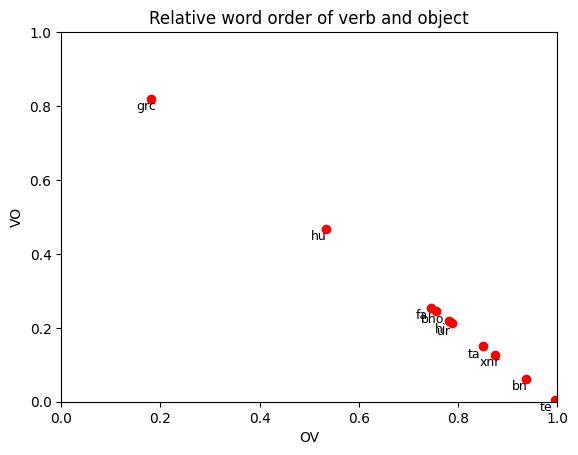

In [21]:
plt.plot(OV, VO, 'ro')
plt.title('Relative word order of verb and object')
plt.xlim([0,1]) # Set the x and y axis ranges
plt.ylim([0,1])
plt.xlabel('OV') # Set the x and y axis labels
plt.ylabel('VO')
for i, lang in enumerate(list(lang_dict.keys())):  # Add labels to each of the points
    plt.text(OV[i]-0.03, VO[i]-0.03, lang, fontsize=9)
plt.savefig(sys.argv[1])
plt.show()